# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


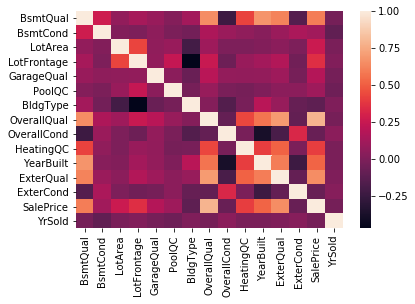

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt

qual_map = {"Ex":10,"Gd":8,"Fa":6,"TA":4,"Po":2,np.nan:0}


csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive
csv_data['ExterQual'] = csv_data['ExterQual'].apply(lambda x: qual_map[x] ) 
csv_data['ExterCond'] = csv_data['ExterCond'].apply(lambda x: qual_map[x] ) 
csv_data['BsmtQual'] = csv_data['BsmtQual'].apply(lambda x: qual_map[x] )
csv_data['BsmtCond'] = csv_data['BsmtCond'].apply(lambda x: qual_map[x] )
csv_data['KitchenQual'] = csv_data['KitchenQual'].apply(lambda x: qual_map[x] )
csv_data['FireplaceQu'] = csv_data['FireplaceQu'].apply(lambda x: qual_map[x] )  
csv_data['GarageQual'] = csv_data['GarageQual'].apply(lambda x: qual_map[x] ) 
csv_data['GarageCond'] = csv_data['GarageCond'].apply(lambda x: qual_map[x] ) 
csv_data['PoolQC'] = csv_data['PoolQC'].apply(lambda x: qual_map[x]) 
csv_data['HeatingQC'] = csv_data['HeatingQC'].apply(lambda x: qual_map[x]) 

interesting_variables = ["BsmtQual","BsmtCond","LotArea","LotFrontage","GarageQual","PoolQC","BldgType","OverallQual","OverallCond","HeatingQC","YearBuilt","ExterQual","ExterCond","SalePrice","YrSold"]

csv_data['Alley'] = csv_data['Alley'].fillna('NotApplicable')
csv_data = csv_data.loc[:,interesting_variables]

cat_variables = ['BldgType']#,'Condition1','Condition2']
#print(csv_data.head(2))
for column in cat_variables :
  csv_data[column] = pd.factorize(csv_data[column])[0]+1 

#corelation_values = {}
#for int_1,int_2 in itertools.combinations(interesting_variables, 2):
  #corelation_values[int_1+'-'+int_2] = stats.stats.pearsonr(csv_data.loc[:, int_1], csv_data.loc[:, int_2])
#result = pd.DataFrame.from_dict(corelation_values, orient='index')

corelations = csv_data.corr(method='pearson')
seaborn.heatmap(corelations)

  

Positive Correlations :
1.   YearBuilt-SalePrice - This shows a positive correlation which means that as time went by, houses became more expensive.
2.   OverallQual/Overallcond-SalePrice - Shows a positive relation as houses in a better condition will cost more.
3.   HeatingQC-BsmtQual- One reason for heating quality being better with a good quality basement could be that heating equiment. for the house is stored in the basement. If a basement is repaired/renovated then we can expect the heating equipment to be fixed as well.
4.   LotArea-LotFrontage - Houses with larger LotAreas are expected to have a larger LotFrontages, since more space could be allocated to building a LotFrontage.


Negative Correlations:
1.   OverallQual-BsmtCond: Suprisingly Basequality inversely corelated with Overallquality. One reason could be a lot of expenses were put in building the house overall and very few in the basement, since looks of the house matter more.
2.   LotArea-YearBuilt: Since houses got expensive over time, it is also obvious that the size of the houses/lots sold also decreased.
3.   HeatingQC-YearSold: HeatingQuality worsening with time could be due to poor heating equipment being built over the years. We cannot say for sure, but fluctuations in climate due do climate change may account for perceived poor heating quality.
4.   PoolQC-YrSold : One reason for lowering pool quality with time could be that the cost of building pools increased and hence cost cuts were made in building a pool.






## Part 2 - Informative Plots

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


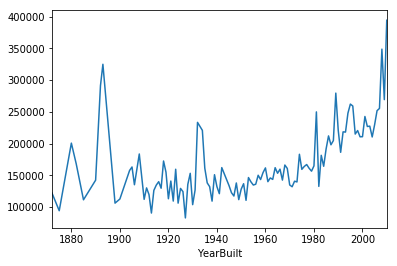

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt


csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive

compare_1 = csv_data.loc[:,['YearBuilt','SalePrice']]
compare_1 = csv_data.groupby('YearBuilt')['SalePrice'].mean()

#compare_2 = csv_data.loc[:,['LotArea','SalePrice']]
#compare_2 = csv_data.groupby('LotArea')['SalePrice'].mean()

#plt.plot(compare_1)
#plt.plot(compare_2)

#fig, axs = plt.subplots(2,1, figsize=(20, 10))


compare_1.plot()




Here the plot shows the relation between the SalePrice over the years. It is evident that the cost of the houses kept increasing with time, which is indicative of either purchasing power of people/currency reducing or the housing market doing extremely well with a very high demand from the people.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


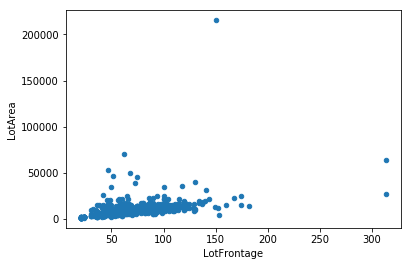

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt


csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive
compare_2 = csv_data.loc[:,['OverallQual','OverallCond','YrSold','HouseStyle','LotArea','LotFrontage']]
compare_2['LotFrontage'].fillna(0)
compare_2.plot.scatter('LotFrontage','LotArea')


This ScatterPlot plots the LotArea with the LotFrontage; it shows how larger LotArea's yield in larger LotFrontage's. This is because people with larger homes are more likely to have a Lotfrontage attached to them while smaller home either might not have a LotFrontage or have a small one.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd596f9860>]],
      dtype=object)

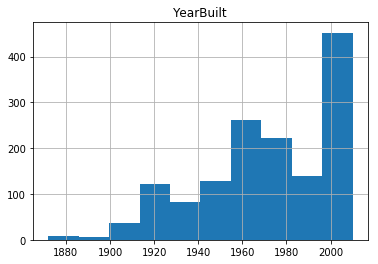

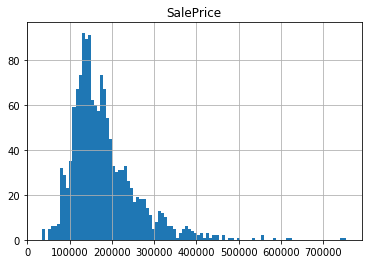

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt


csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive

csv_data = csv_data.loc[:,['YearBuilt','SalePrice']]
#csv_data['SalePrice'] = np.log(csv_data['SalePrice'])
csv_data.hist(column='YearBuilt')
csv_data.hist(column='SalePrice',bins=100)

Plot1 : Histograms of houses constructed per decade. It is evident from this plot that more houses were constructed in a decade, i.e which could be because of an increase in population over the years requiring more houses.


Plot2 : Histograms of the SalePrice shows that more of the houses were in the 100000 - 200000 range. There were lesser and lesser houses after the $400,000 range. 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


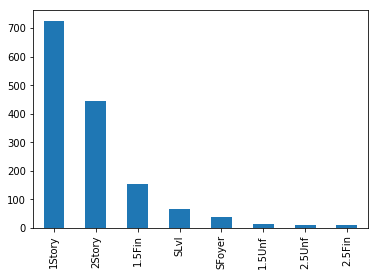

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt


csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive


csv_data = csv_data.loc[:,['HouseStyle','BldgType']]

csv_data['HouseStyle'].value_counts().plot.bar()

csv_data['BldgType'].value_counts().plot.bar()


Plot 4 shows the bar chart of the types of buildings and it is evident that the 1Story buildings are the most in abudance, followed by the 2Story and the 1.5Fin building types.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


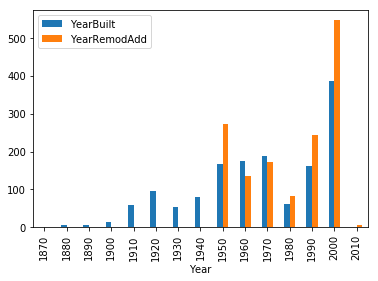

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt


csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive


data_1 = csv_data.loc[:,['YearBuilt']]
data_2 = csv_data.loc[:,['YearRemodAdd']]

data_1['YearBuilt'] = data_1['YearBuilt'].apply(lambda x : (x//10)*10)
data_2['YearRemodAdd'] = data_2['YearRemodAdd'].apply(lambda x : (x//10)*10)



data_1 = data_1.groupby(('YearBuilt'))['YearBuilt'].count().rename_axis('Year')
data_1 = pd.DataFrame(data_1)
data_2 = data_2.groupby(('YearRemodAdd'))['YearRemodAdd'].count().rename_axis('Year')
data_2 = pd.DataFrame(data_2)


combined = (pd.merge(data_1,data_2, how='outer', on=['Year'])).fillna(0)

combined.plot.bar()



Plot 5 compares per decade the number of houses built versus the number of houses repaired/renovated. This is indicative of more houses being repaired/renovated than being created, there was no need to build new ones since the older could be remodelled.

Also houses prior to 1950's dont show any details of being remodelled, indicative that they were most likely newly built and had no reason to be remodelled.

## Part 3 - Handcrafted Scoring Function

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt


csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive
qual_map = {"Ex":10,"Gd":8,"Fa":6,"TA":4,"Po":2}


csv_data['ExterQual'] = csv_data['ExterQual'].apply(lambda x: qual_map[x] ) 
csv_data['ExterCond'] = csv_data['ExterCond'].apply(lambda x: qual_map[x] ) 

csv_data['kitchen_qual'] = csv_data['KitchenQual'].apply(lambda x: qual_map[x] )
csv_data['avg_condition'] = (csv_data['OverallQual']+csv_data['OverallCond'])/2 # Avg overall condition
csv_data['ext_condition'] = (csv_data['ExterQual']+csv_data['ExterCond'])/2 #Avg Ext condition
csv_data['value_for_money'] = (np.log(csv_data['SalePrice']/csv_data['LotArea'])) # Value for money

conditions = [(csv_data['YearBuilt'] > 2000),
              (csv_data['YearBuilt'] > 1980) & (csv_data['YearBuilt'] < 2000 ),
              (csv_data['YearBuilt'] > 1960) & (csv_data['YearBuilt'] < 1980),
              (csv_data['YearBuilt'] > 1940) & (csv_data['YearBuilt'] < 1960),
              (csv_data['YearBuilt'] > 1900) & (csv_data['YearBuilt'] < 1940)
             ]
choices = [10,8,6,4,2]

csv_data['YearBuilt'] = np.select(conditions,choices,default=0)
csv_data['CentralAir'] = csv_data['CentralAir'].apply(lambda x : 4 if x == 'Y' else 0)
csv_data['Utilities'] = csv_data['Utilities'].apply(lambda x : 3 if x == 'AllPub' else 0)
processed_data = csv_data.loc[:,['kitchen_qual','avg_condition','ext_condition','value_for_money','YearBuilt','CentralAir','Utilities']] #
processed_data['score'] = processed_data.sum(axis=1)
best_10 = processed_data.sort_values(by=['score'],ascending=False).head(10)
worst_10 = processed_data.sort_values(by=['score'],ascending=False).tail(10)

#worst_10 = worst_10.loc[:,['score']]
print(worst_10.head(10))
print(best_10.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      kitchen_qual  avg_condition  ext_condition  value_for_money  YearBuilt  \
Id                                                                             
1381             4            3.0            5.0         1.963430          2   
917              4            2.5            4.0         1.366970          4   
521              4            5.5            4.0         2.286249          0   
999              4            3.5            4.0         2.229907          2   
810              4            5.0            4.0         2.571575          0   
1293             4            4.5            4.0         2.790421          0   
243              4            4.5            4.0         2.760010          0   
621              4            3.0            4.0         2.094722          2   
1063             4            5.0            4.0         1.889740      

The ten most desirable houses are as follows with their Id and scores :

1.  1374 - 45.211645
2.  441  - 45.082590
3.  390  - 45.030793
4.  592  - 45.012513
5.  1244 - 45.010796
6.  516  - 44.995518
7.  899  - 44.857473
8.  225  - 44.855871
9.  1443 - 44.838404
10. 995  - 44.799363




The ten least desirable houses are as follows with their Id and scores :

1. 1381 - 18.963430
2. 917 - 18.866970
3. 521 - 18.786249
4. 999 - 18.729907
5. 810 - 18.571575
6. 1293 - 18.290421
7. 243 - 18.260010
8. 621 - 18.094722
9. 1063 - 17.889740
10. 677 -16.204145

The scoring function was constructed as follows :
1.   Take into account the parameters coding for quality of the home. Good quality homes were given a high score, poorer quality home were given a lower score. This was based on the fields ExterQual, ExterCond, OverallQual, OverallCond, KitchenQual
2.   Next look at how far in the past the houses were built, the older the houses the lower the score. The newer the house built the higher the score.
3. Lastly take into account the value for money i.e dollar amount per unit area. This was because higher costing homes could be in better living areas.
4. Sum these values up, as evident from the output the higher scoring homes overall had better condtions of the home and were more desirable. The lowerer scoring homes showed poor quality in their overall condtions (exterior, kitchen, etc).



## Part 4 - Pairwise Distance Function 

In [24]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import *
import sys
import json
csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive
qual_map = {"Ex":10,"Gd":8,"Fa":6,"TA":4,"Po":2,np.nan:0}



category_columns = ['MSZoning','Street','LotShape','Utilities','LotConfig',
                    'LotConfig','Condition1','Condition2','BldgType',
                    'HouseStyle','LandContour','RoofStyle','RoofMatl','Exterior1st',
                    'Exterior2nd','MasVnrType','LandSlope','Neighborhood','Foundation','BsmtExposure','BsmtFinType1',
                    'BsmtFinSF1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','GarageType',
                   'Functional','GarageFinish','Fence','MiscFeature','SaleType','PavedDrive','SaleCondition','Alley']
 
 
  
  
for column in category_columns :
  csv_data[column] = pd.factorize(csv_data[column])[0]+1



csv_data['YearBuilt'] = csv_data['YearBuilt'].apply(lambda x : (x//10)*10)
csv_data['YearRemodAdd'] = csv_data['YearRemodAdd'].apply(lambda x : (x//10)*10)
csv_data['ExterQual'] = csv_data['ExterQual'].apply(lambda x: qual_map[x] ) 
csv_data['ExterCond'] = csv_data['ExterCond'].apply(lambda x: qual_map[x] ) 
csv_data['BsmtQual'] = csv_data['BsmtQual'].apply(lambda x: qual_map[x] )
csv_data['BsmtCond'] = csv_data['BsmtCond'].apply(lambda x: qual_map[x] )
csv_data['KitchenQual'] = csv_data['KitchenQual'].apply(lambda x: qual_map[x] )
csv_data['FireplaceQu'] = csv_data['FireplaceQu'].apply(lambda x: qual_map[x] )  
csv_data['GarageQual'] = csv_data['GarageQual'].apply(lambda x: qual_map[x] ) 
csv_data['GarageCond'] = csv_data['GarageCond'].apply(lambda x: qual_map[x] ) 
csv_data['PoolQC'] = csv_data['PoolQC'].apply(lambda x: qual_map[x] ) 
 
 
csv_data = csv_data.fillna(0)

shape = csv_data.shape

 

      


    
max_cost = csv_data.loc[csv_data['SalePrice'].idxmax()].values.tolist()
min_cost = csv_data.loc[csv_data['SalePrice'].idxmin()].values.tolist()
plot_values = []




random_data_points = np.random.choice(shape[0],2)

diff = []  
for idx,num in enumerate(random_data_points):

  row_vector = csv_data.iloc[num,:].values.tolist()  

  diff_1 = 10000
  diff_2 = 10000



  for i,ele in enumerate(row_vector) :
    if row_vector[i] != max_cost[i] :
      diff_1 -= 40

    if row_vector[i] != min_cost[i] :
      diff_2 -= 40 

  diff.append([diff_1,diff_2])




print("Distance between {} {} is {} ".format(random_data_points[0],random_data_points[1],pdist(diff,'euclidean')))
#print(csv_data.iloc[random_data_points[0],:])
#print(csv_data.iloc[random_data_points[1],:])
  
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Distance between 905 33 is [268.3281573] 


The pairwise distance function was a simple function that computed as follows :
1. Fetch the houses that have the highest selling price and the lowest selling price.
2. Compare the feature of each house with that of the one with the highest selling price with that of the lowest selling price.
3. Assign the houses a score X and score Y
4. A difference in feature with the highest selling home will result in a deduction from score X, a difference in feature from the lowest selling home will result in deduction from score Y.
5. These form our co-ordinates of scores that reflect a pairwise distance.
6. This formula will perform well if the houses if closer to the Maximum or Minimum SalePrice and has more features in common.


## Part 5 - Clustering 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


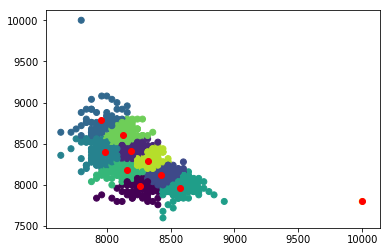

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt
from scipy.spatial.distance import *
from sklearn.metrics import *
import sys
from sklearn.cluster import KMeans

csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive
qual_map = {"Ex":10,"Gd":8,"Fa":6,"TA":4,"Po":2,np.nan:0}



category_columns = ['MSZoning','Street','LotShape','Utilities','LotConfig',
                    'LotConfig','Condition1','Condition2','BldgType',
                    'HouseStyle','LandContour','RoofStyle','RoofMatl','Exterior1st',
                    'Exterior2nd','MasVnrType','LandSlope','Neighborhood','Foundation','BsmtExposure','BsmtFinType1',
                    'BsmtFinSF1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','GarageType',
                   'Functional','GarageFinish','Fence','MiscFeature','SaleType','PavedDrive','SaleCondition','Alley']
 
 
  
for column in category_columns :
  csv_data[column] = pd.factorize(csv_data[column])[0]+1


csv_data['YearBuilt'] = csv_data['YearBuilt'].apply(lambda x : (x//10)*10)
csv_data['YearRemodAdd'] = csv_data['YearRemodAdd'].apply(lambda x : (x//10)*10)
csv_data['ExterQual'] = csv_data['ExterQual'].apply(lambda x: qual_map[x] ) 
csv_data['ExterCond'] = csv_data['ExterCond'].apply(lambda x: qual_map[x] ) 
csv_data['BsmtQual'] = csv_data['BsmtQual'].apply(lambda x: qual_map[x] )
csv_data['BsmtCond'] = csv_data['BsmtCond'].apply(lambda x: qual_map[x] )
csv_data['KitchenQual'] = csv_data['KitchenQual'].apply(lambda x: qual_map[x] )
csv_data['FireplaceQu'] = csv_data['FireplaceQu'].apply(lambda x: qual_map[x] )  
csv_data['GarageQual'] = csv_data['GarageQual'].apply(lambda x: qual_map[x] ) 
csv_data['GarageCond'] = csv_data['GarageCond'].apply(lambda x: qual_map[x] ) 
csv_data['PoolQC'] = csv_data['PoolQC'].apply(lambda x: qual_map[x] ) 
 
 
csv_data = csv_data.fillna(0)

shape = csv_data.shape

         
max_cost =csv_data.loc[csv_data['SalePrice'].idxmax()].values.tolist()
min_cost = csv_data.loc[csv_data['SalePrice'].idxmin()].values.tolist()
plot_values = []

for row1 in range (0,shape[0]):

  row_vector = csv_data.iloc[row1,:].values.tolist()  

  diff_1 = 10000
  diff_2 = 10000
  
  
  
  for i,ele in enumerate(row_vector) :
    if row_vector[i] != max_cost[i] :
      diff_1 -= 40
      
    if row_vector[i] != min_cost[i] :
      diff_2 -= 40 
  
  
  plot_values.append([diff_1,diff_2]) 


plot_values = pd.DataFrame(plot_values,columns=['x','y'])

plot_values = plot_values.replace(-np.Inf,1000000000)


kmeans = KMeans(n_clusters=10,n_jobs=20,max_iter=500)
kmeans.fit(plot_values)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(plot_values['x'], plot_values['y'], c= kmeans.labels_.astype(float),  )
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')






In this case the clusters capture those houses based on how far they sit from the difference in features from the lowest selling and the highest selling homes.

As we can see a total of 10 clusters have been formed and cluster together those houses which are evenly distant from the Maximum Priced and the Minimum Priced home.

## Part 6 - Linear Regression

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
#drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import *
import sys
from sklearn.cluster import KMeans
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive
qual_map = {"Ex":10,"Gd":8,"Fa":6,"TA":4,"Po":2,"NA":0}


csv_data = csv_data.loc[:,['LotArea','LotFrontage','OverallQual','OverallCond',
                           'YearBuilt','Utilities','1stFlrSF','2ndFlrSF','MasVnrArea',
                           'YearRemodAdd','YrSold','BsmtQual','BsmtCond','ExterQual',
                           'ExterCond','HeatingQC','GrLivArea','Street',
                           'BedroomAbvGr','GarageCars','GarageArea','HouseStyle',
                           'BldgType','SalePrice']]

csv_data['LotFrontage'] = csv_data['LotFrontage'].fillna(0)
csv_data['BsmtQual'] = csv_data['BsmtQual'].fillna('NA')
csv_data['BsmtCond'] = csv_data['BsmtCond'].fillna('NA')
csv_data['MasVnrArea'] = csv_data['MasVnrArea'].fillna(0)
csv_data['BsmtQual'] = csv_data['BsmtQual'].apply(lambda x: qual_map[x] ) 
csv_data['BsmtCond'] = csv_data['BsmtCond'].apply(lambda x: qual_map[x] ) 
csv_data['ExterQual'] = csv_data['ExterQual'].apply(lambda x: qual_map[x] ) 
csv_data['ExterCond'] = csv_data['ExterCond'].apply(lambda x: qual_map[x] ) 
csv_data['HeatingQC'] = csv_data['HeatingQC'].apply(lambda x: qual_map[x] ) 
csv_data = pd.get_dummies(csv_data,prefix_sep="_",columns=['HouseStyle','BldgType','Utilities','Street'])

predictions = csv_data.pop('SalePrice')
x_train, x_test, y_train, y_test = train_test_split(csv_data, predictions, test_size=.8)

regr = LinearRegression()
regr.fit(x_train, y_train)
preds = regr.predict(x_test)



print("Accuracy Score: "+str(r2_score(preds,y_test)))






Accuracy Score: 0.7389323028964749


The Linder regression model works with an accuracy of 73%. The following is to be noted :


1.   House quality contributes a lot more to the predictions of the price.
2.   Basement Area / LotArea also seem to contribute positively to the price predictions, removing these values adversely affected the performance of the model
3.  Year built positively contributed to the predictions, removing this value also adversely affected the performance of the model.






## Part 7 - External Dataset 

In [1]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import *
import sys
from sklearn.cluster import KMeans
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive

ext_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/ownership.csv') #Loading content from google drive

ext_data['DATE'] = ext_data['DATE'].apply(lambda x : int(x.split('/')[2])//10*10)


ext_data = ext_data.groupby('DATE')['ownership_rate'].mean().reset_index()



csv_data['decadesold'] = csv_data['YrSold'].apply(lambda x : int(x)//10*10)   

csv_data['ownsership_rate'] = csv_data['decadesold']


ownership_map = {}

for data,value in ext_data.iterrows() :
    ownership_map[value[0]] = value[1]

 

  


  
csv_data['ownsership_rate'] = csv_data['ownsership_rate'].apply(lambda x : ownership_map[x]  )





  
category_columns = ['MSZoning','Street','LotShape','Utilities',
                    'LotConfig','Condition1','Condition2','BldgType',
                    'HouseStyle','LandContour','RoofStyle','RoofMatl','Exterior1st',
                    'Exterior2nd','MasVnrType','LandSlope','Neighborhood','Foundation','BsmtExposure','BsmtFinType1',
                    'BsmtFinSF1','BsmtFinType2','Heating','CentralAir','Electrical','GarageType',
                   'Functional','GarageFinish','Fence','MiscFeature','SaleType','PavedDrive','SaleCondition','Alley']
 





qual_map = {"Ex":10,"Gd":8,"Fa":6,"TA":4,"Po":2,"NA":0}
csv_data['LotFrontage'] = csv_data['LotFrontage'].fillna(0)
csv_data['BsmtQual'] = csv_data['BsmtQual'].fillna('NA')
csv_data['BsmtCond'] = csv_data['BsmtCond'].fillna('NA')
csv_data['GarageCond'] = csv_data['GarageCond'].fillna('NA')
csv_data['GarageQual'] = csv_data['GarageQual'].fillna('NA')
csv_data['MasVnrArea'] = csv_data['MasVnrArea'].fillna(0)
csv_data['BsmtQual'] = csv_data['BsmtQual'].apply(lambda x: qual_map[x] ) 
csv_data['BsmtCond'] = csv_data['BsmtCond'].apply(lambda x: qual_map[x] ) 
csv_data['ExterQual'] = csv_data['ExterQual'].apply(lambda x: qual_map[x] ) 
csv_data['ExterCond'] = csv_data['ExterCond'].apply(lambda x: qual_map[x] ) 
csv_data['HeatingQC'] = csv_data['HeatingQC'].apply(lambda x: qual_map[x] )
csv_data['GarageQual'] = csv_data['GarageQual'].apply(lambda x: qual_map[x] ) 
csv_data['GarageCond'] = csv_data['GarageCond'].apply(lambda x: qual_map[x] ) 
csv_data['KitchenQual'] = csv_data['KitchenQual'].apply(lambda x: qual_map[x] ) 

csv_data['FireplaceQu'] = csv_data['FireplaceQu'].fillna('NA')
csv_data['FireplaceQu'] = csv_data['FireplaceQu'].apply(lambda x: qual_map[x] ) 


csv_data['PoolQC'] = csv_data['PoolQC'].fillna('NA')
csv_data['PoolQC'] = csv_data['PoolQC'].apply(lambda x: qual_map[x] ) 
  


  
for column in category_columns :
  csv_data[column] = pd.factorize(csv_data[column])[0]+1  
  



csv_data = csv_data.fillna(0)

predictions = csv_data.pop('SalePrice')
x_train, x_test, y_train, y_test = train_test_split(csv_data, predictions, test_size=.8)

regr = LinearRegression()
regr.fit(x_train, y_train)
preds = regr.predict(x_test)


print("Accuracy Score: "+str(r2_score(preds,y_test)))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Accuracy Score: 0.7038730256474941


A data set from Fred at the following link was integrated "https://fred.stlouisfed.org/series/IAHOWN" . It contains information of the home ownership rate at a time. The data was further refined and the decade value was picked up for this data set and mapped to the YearSold column in our test dataset. This home ownership rate helped better identify the possibility of a house being sold if the demand in that decade is high.


It makes more sense to have a field that is indicative of the number of people in percentage living in homes, this indicates a well performing hosuing market and the likelyhood of a house being sold and the cost. Higher the demand in an era higher its cost.





## Part 8 - Permutation Test 

In [23]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import *
import sys
from sklearn.cluster import KMeans
import sklearn

from sklearn.model_selection import train_test_split,permutation_test_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive
test_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/test.csv',index_col='Id') #Loading content from google drive

qual_map = {"Ex":10,"Gd":8,"Fa":6,"TA":4,"Po":2,"NA":0}




csv_data['LotFrontage'] = csv_data['LotFrontage'].fillna(0)
csv_data['BsmtQual'] = csv_data['BsmtQual'].fillna('NA')
csv_data['BsmtCond'] = csv_data['BsmtCond'].fillna('NA')
csv_data['MasVnrArea'] = csv_data['MasVnrArea'].fillna(0)
csv_data['BsmtQual'] = csv_data['BsmtQual'].apply(lambda x: qual_map[x] ) 
csv_data['BsmtCond'] = csv_data['BsmtCond'].apply(lambda x: qual_map[x] ) 
csv_data['ExterQual'] = csv_data['ExterQual'].apply(lambda x: qual_map[x] ) 
csv_data['ExterCond'] = csv_data['ExterCond'].apply(lambda x: qual_map[x] ) 
csv_data['HeatingQC'] = csv_data['HeatingQC'].apply(lambda x: qual_map[x] ) 

csv_data = csv_data.fillna(0)



test_data['LotFrontage'] = test_data['LotFrontage'].fillna(0)
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('NA')
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('NA')
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)
test_data['BsmtQual'] = test_data['BsmtQual'].apply(lambda x: qual_map[x] ) 
test_data['BsmtCond'] = test_data['BsmtCond'].apply(lambda x: qual_map[x] ) 
test_data['ExterQual'] = test_data['ExterQual'].apply(lambda x: qual_map[x] ) 
test_data['ExterCond'] = test_data['ExterCond'].apply(lambda x: qual_map[x] ) 
test_data['HeatingQC'] = test_data['HeatingQC'].apply(lambda x: qual_map[x] ) 
test_data = test_data.fillna(0) 

feature_column  = ['LotFrontage','BsmtQual','BsmtCond','MasVnrArea','BsmtQual','ExterQual','ExterCond','HeatingQC']

rms = [] 
prdict_data = csv_data.pop('SalePrice')

for column in feature_column :

  x_train, x_test, y_train, y_test = train_test_split(csv_data[column].values.reshape(-1,1),prdict_data.values.reshape(-1,1),test_size=0.25)

  regressor = LinearRegression()
  
  regressor.fit(x_train, y_train)
  predictions = regressor.predict(x_test)

  
  difference = np.log(y_test) - np.log(predictions)
  difference = difference**2
  difference = np.sqrt(difference.mean())

  rms.append(diff)

  score, pscores, pvalues = permutation_test_score(regressor,x_train,y_train,cv=2, n_permutations=150)
  
  print("For feature {} the actual score is {} and the pvalue is {} ".format(column,difference,pvalues))
  print("\n")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
For feature LotFrontage the actual score is 0.3992954605676762 and the pvalue is 0.006622516556291391 


For feature BsmtQual the actual score is 0.33163560163547295 and the pvalue is 0.006622516556291391 


For feature BsmtCond the actual score is 0.399063935413795 and the pvalue is 0.006622516556291391 


For feature MasVnrArea the actual score is 0.32413515825336303 and the pvalue is 0.006622516556291391 


For feature BsmtQual the actual score is 0.3434027503513522 and the pvalue is 0.006622516556291391 


For feature ExterQual the actual score is 0.32058419007242217 and the pvalue is 0.006622516556291391 


For feature ExterCond the actual score is 0.4513499794180524 and the pvalue is 0.013245033112582781 


For feature HeatingQC the actual score is 0.3846595356775622 and the pvalue is 0.006622516556291391 




The linear regression was performed for 10 features and along with that a ptest was performed such that the feature values were randomly shuffled.

To compare how this performs for each feature the actual score was at least 30%, with the ptest however the pvalues denoted the score lower than .01 in most cases.


This implied that the fields on which we tested our model actually mattered in the training process.

## Part 9 - Final Result

In [0]:
from google.colab import drive
#import logging
from datetime import datetime
drive.mount('/content/drive')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
from pandas.api.types import CategoricalDtype
from  scipy import stats
import itertools
import seaborn
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import *
import sys
from sklearn.cluster import KMeans
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import *
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

csv_data =  pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv',index_col='Id') #Loading content from google drive
test_data = pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/test.csv',index_col='Id')
qual_map = {"Ex":10,"Gd":8,"Fa":6,"TA":4,"Po":2,np.nan:0}



category_columns = ['MSZoning','Street','LotShape','Utilities',
                    'LotConfig','Condition1','Condition2','BldgType',
                    'HouseStyle','LandContour','RoofStyle','RoofMatl','Exterior1st',
                    'Exterior2nd','MasVnrType','LandSlope','Neighborhood','Foundation','BsmtExposure','BsmtFinType1',
                    'BsmtFinSF1','BsmtFinType2','Heating','CentralAir','Electrical','GarageType',
                   'Functional','GarageFinish','Fence','MiscFeature','SaleType','PavedDrive','SaleCondition','Alley']
 


  
  
for column in category_columns :
  csv_data[column] = pd.factorize(csv_data[column])[0]+1
  test_data[column] = pd.factorize(test_data[column])[0]+1
  #data = csv_data.pop(column)
  #test_data.pop(column) 
  
csv_data['YearBuilt'] = csv_data['YearBuilt'].apply(lambda x : (x//10)*10)
csv_data['YearRemodAdd'] = csv_data['YearRemodAdd'].apply(lambda x : (x//10)*10)
csv_data['ExterQual'] = csv_data['ExterQual'].apply(lambda x: qual_map[x] ) 
csv_data['ExterCond'] = csv_data['ExterCond'].apply(lambda x: qual_map[x] ) 
csv_data['BsmtQual'] = csv_data['BsmtQual'].apply(lambda x: qual_map[x] )
csv_data['BsmtCond'] = csv_data['BsmtCond'].apply(lambda x: qual_map[x] )
csv_data['KitchenQual'] = csv_data['KitchenQual'].apply(lambda x: qual_map[x] )
csv_data['FireplaceQu'] = csv_data['FireplaceQu'].apply(lambda x: qual_map[x] )  
csv_data['GarageQual'] = csv_data['GarageQual'].apply(lambda x: qual_map[x] ) 
csv_data['GarageCond'] = csv_data['GarageCond'].apply(lambda x: qual_map[x] ) 
csv_data['PoolQC'] = csv_data['PoolQC'].apply(lambda x: qual_map[x] ) 
csv_data['HeatingQC'] = csv_data['HeatingQC'].apply(lambda x: qual_map[x] )  
 
csv_data = csv_data.fillna(0)


#Formatting the test data
test_data['YearBuilt'] = test_data['YearBuilt'].apply(lambda x : (x//10)*10)
test_data['YearRemodAdd'] = test_data['YearRemodAdd'].apply(lambda x : (x//10)*10)
test_data['ExterQual'] = test_data['ExterQual'].apply(lambda x: qual_map[x] ) 
test_data['ExterCond'] = test_data['ExterCond'].apply(lambda x: qual_map[x] ) 
test_data['BsmtQual'] = test_data['BsmtQual'].apply(lambda x: qual_map[x] )
test_data['BsmtCond'] = test_data['BsmtCond'].apply(lambda x: qual_map[x] )
test_data['KitchenQual'] = test_data['KitchenQual'].apply(lambda x: qual_map[x] )
test_data['FireplaceQu'] = test_data['FireplaceQu'].apply(lambda x: qual_map[x] )  
test_data['GarageQual'] = test_data['GarageQual'].apply(lambda x: qual_map[x] ) 
test_data['GarageCond'] = test_data['GarageCond'].apply(lambda x: qual_map[x] ) 
test_data['PoolQC'] = test_data['PoolQC'].apply(lambda x: qual_map[x] ) 
test_data['HeatingQC'] = test_data['HeatingQC'].apply(lambda x: qual_map[x] )




predictions = csv_data.pop('SalePrice')


csv_data = csv_data.fillna(0)
test_data = test_data.fillna(0)

from sklearn.linear_model import  LinearRegression

clf = LinearRegression()
clf.fit(csv_data, predictions)
preds = clf.predict(test_data)


prediction = pd.DataFrame({
    "Id" : list(test_data.index),
    "SalePrice" : list(preds)
})


f = open('/content/drive/My Drive/response_2.csv','w')
prediction.to_csv(r'/content/drive/My Drive/response_2.csv',index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kaggle Link: https://www.kaggle.com/virajkcs

Highest Rank: 3621

Score: 0.17303



Number of entries: 6



Kaggle Ranking : https://drive.google.com/open?id=18CSAPzaunEFgnEs3sTcE_5pL9Q_WHhkj
